# Q1: Setup & Exploration

**Phase 1-2:** Project Setup, Data Exploration  
**Points: 6 points**

**Focus:** Load data, perform initial inspection, identify data quality issues.

**Lecture Reference:** Lecture 11, Notebook 1 ([`11/demo/01_setup_exploration_cleaning.ipynb`](https://github.com/christopherseaman/datasci_217/blob/main/11/demo/01_setup_exploration_cleaning.ipynb)), Phases 1-2. Also see Lecture 04 (pandas I/O) and Lecture 07 (visualization).

---

## Setup

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
import os

# Create output directory
os.makedirs('output', exist_ok=True)

# Set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
##Part 1:
df = pd.read_csv('data/beach_sensors.csv')

## Shape:
shape = f"Dataset Shape: {df.shape}"
shape

##Col names:
col_names = "Column Names:\n"
for i in df.columns:
    col_names += f"- {i}\n"
print(col_names)

##Data type:
data_type = "Data Types:\n"
for i in df.columns:
    data_type += f"- {i}: {df[i].dtype}\n"
print(data_type)

## Date range:
df['Measurement Timestamp'] = pd.to_datetime(df['Measurement Timestamp'], errors='coerce')
start_date = df['Measurement Timestamp'].min()
end_date = df['Measurement Timestamp'].max()
data_text = f"Date Range:\nStart: {start_date}\nEnd: {end_date}"
print(data_text)

##Missing value:
na_text = "Missing Values:\n"
na_counts = df.isna().sum()
na_pct = df.isna().mean() * 100
for c in df.columns:
    na_text += f"- {c}: {na_counts[c]} ({na_pct[c]:.1f}%)\n"
print(na_text)

##now I can put them together:
with open("output/q1_data_info.txt", "w") as f:
    f.write(shape + "\n\n")
    f.write(col_names + "\n")
    f.write(data_type + "\n")
    f.write(data_text + "\n\n")
    f.write(na_text + "\n")
print("Saved to output/q1_data_info.txt")


Column Names:
- Station Name
- Measurement Timestamp
- Air Temperature
- Wet Bulb Temperature
- Humidity
- Rain Intensity
- Interval Rain
- Total Rain
- Precipitation Type
- Wind Direction
- Wind Speed
- Maximum Wind Speed
- Barometric Pressure
- Solar Radiation
- Heading
- Battery Life
- Measurement Timestamp Label
- Measurement ID

Data Types:
- Station Name: object
- Measurement Timestamp: object
- Air Temperature: float64
- Wet Bulb Temperature: float64
- Humidity: int64
- Rain Intensity: float64
- Interval Rain: float64
- Total Rain: float64
- Precipitation Type: float64
- Wind Direction: int64
- Wind Speed: float64
- Maximum Wind Speed: float64
- Barometric Pressure: float64
- Solar Radiation: int64
- Heading: float64
- Battery Life: float64
- Measurement Timestamp Label: object
- Measurement ID: object

Date Range:
Start: 2015-04-25 09:00:00
End: 2025-12-10 13:00:00
Missing Values:
- Station Name: 0 (0.0%)
- Measurement Timestamp: 0 (0.0%)
- Air Temperature: 75 (0.0%)
- Wet Bulb

In [4]:
##Part 2:
# Summary statistics for numerical columns

numeric_cols = df.select_dtypes(include=['int64', 'float64'])
numeric_cols.head()

##mean, std, min, max, missing_count
rows = []
for col in numeric_cols.columns:
    mean_val = numeric_cols[col].mean()
    std_val = numeric_cols[col].std()
    min_val = numeric_cols[col].min()
    max_val = numeric_cols[col].max()
    missing_val = numeric_cols[col].isna().sum()
    rows.append([
        col,
        mean_val,
        std_val,
        min_val,
        max_val,
        missing_val
    ])

##Ready to explore
q1_explore_df = pd.DataFrame(
    rows,
    columns=["column_name", "mean", "std", "min", "max", "missing_count"]
)

##To csv here
q1_explore_df.to_csv("output/q1_exploration.csv", index=False)
print("Saved to output/q1_exploration.csv")


Saved to output/q1_exploration.csv


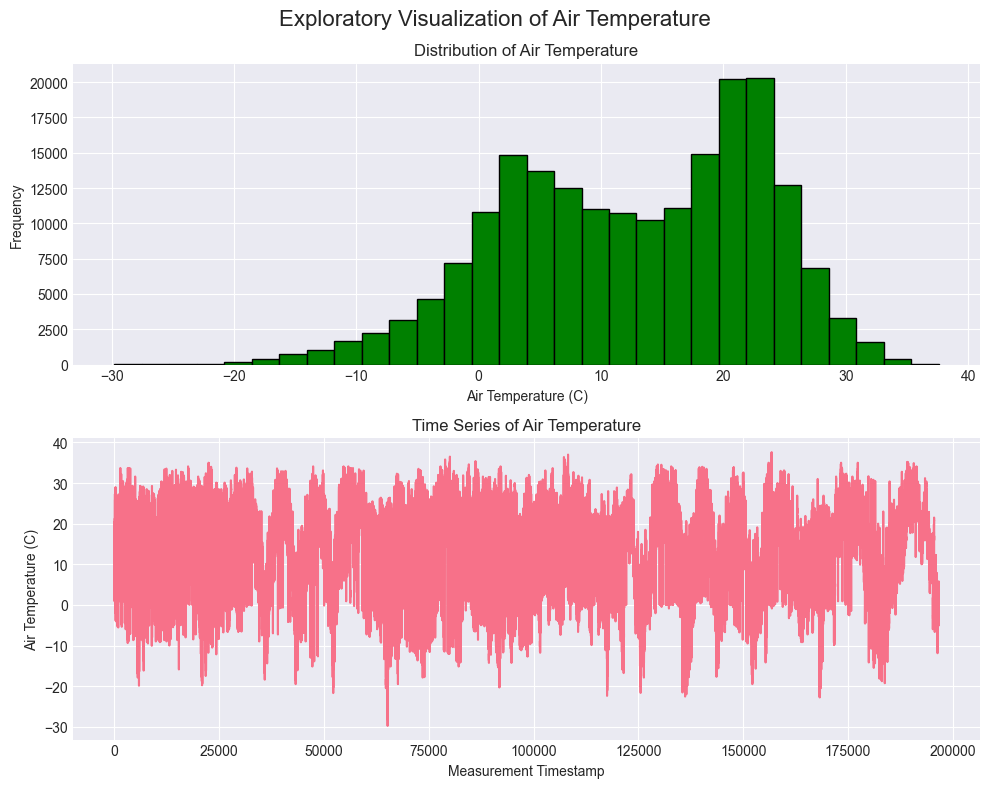

In [5]:
##Part3:

# Creating output/q1_visualizations.png
df.reset_index(inplace = True)
# Histogram
fig, axes = plt.subplots(2,1, figsize = (10, 8))
axes[0].hist(df['Air Temperature'], bins = 30, color = 'green', edgecolor = 'black')
axes[0].set_title('Distribution of Air Temperature')
axes[0].set_xlabel('Air Temperature (C)')
axes[0].set_ylabel('Frequency')

beach_data = df.sort_values('Measurement Timestamp')
beach_data.set_index('Measurement Timestamp', inplace = True)
# Time Series 
axes[1].plot(df.index, df['Air Temperature'])
axes[1].set_title('Time Series of Air Temperature')
axes[1].set_xlabel('Measurement Timestamp')
axes[1].set_ylabel('Air Temperature (C)')
axes[1]

fig.suptitle('Exploratory Visualization of Air Temperature', fontsize = 16)
plt.tight_layout()
plt.savefig('output/q1_visualizations.png', dpi = 300)
plt.show()

beach_data.reset_index(inplace = True)

---

## Objective

Load the Chicago Beach Weather Sensors dataset, perform initial inspection, and identify data quality issues.

**Note:** The datetime column in this dataset is named `Measurement Timestamp`.

**Time Series Note:** Unlike the lecture's NYC Taxi data (event-based), this dataset is **time-series data** with continuous sensor readings. The data is already indexed by time, so you'll work with datetime-indexed dataframes throughout. See **Lecture 09** for time series operations. For time series visualizations, you may want to use pandas `resample()` to aggregate data (e.g., daily averages) for clearer visualization of long-term trends.

---

## Required Artifacts

You must create exactly these 3 files in the `output/` directory:

### 1. `output/q1_data_info.txt`
**Format:** Plain text file
**Content:** Dataset information including:
- Dataset shape (rows × columns)
- Column names (one per line or comma-separated)
- Data types for each column
- Date range (start date and end date) - **REQUIRED if temporal data**
- Missing value counts for each column (column name: count)

**Example format:**
```
Dataset Shape: 50000 rows × 10 columns

Column Names:
- Measurement Timestamp
- Beach
- Water Temperature
- Air Temperature
...

Data Types:
- Measurement Timestamp: datetime64[ns]
- Beach: object
- Water Temperature: float64
...

Date Range:
Start: 2022-01-01 00:00:00
End: 2027-09-15 07:00:00

Missing Values:
- Water Temperature: 2500 (5.0%)
- Air Temperature: 1500 (3.0%)
...
```

### 2. `output/q1_exploration.csv`
**Format:** CSV file
**Required Columns (exact names):** `column_name`, `mean`, `std`, `min`, `max`, `missing_count`
**Content:** One row per numeric column in the dataset
- `column_name`: Name of the numeric column
- `mean`: Mean value (float)
- `std`: Standard deviation (float)
- `min`: Minimum value (float)
- `max`: Maximum value (float)
- `missing_count`: Number of missing values (integer)

**Example:**
```csv
column_name,mean,std,min,max,missing_count
Water Temperature,15.23,5.12,0.5,28.7,2500
Air Temperature,18.45,8.23,-5.2,35.8,1500
Wind Speed,6.78,4.56,0.1,25.3,0
```

### 3. `output/q1_visualizations.png`
**Format:** PNG image file
**Content:** At least 2 plots in a single figure (use subplots)
**Required plots:**
1. **Distribution plot:** Histogram or density plot of at least one numeric variable
2. **Time series plot:** Line plot showing a numeric variable over time (if temporal data)

**Requirements:**
- Clear axis labels (xlabel, ylabel)
- Title for each subplot
- Overall figure title (optional but recommended)
- Legend if multiple series shown
- Saved as PNG with sufficient resolution (dpi=150 or higher)

---

## Requirements Checklist

- [ ] Data loaded successfully from `data/beach_sensors.csv`
- [ ] Initial inspection completed (shape, info, head, describe)
- [ ] Missing values identified and counted
- [ ] Basic visualizations created (at least 2 plots: distribution + time series)
- [ ] All 3 required artifacts saved with exact filenames

---

## Your Approach

1. **Load and inspect the dataset** - Use standard pandas I/O and inspection methods
2. **Parse datetime** - Identify and convert datetime column(s)
3. **Identify missing values** - Count and calculate percentages per column
4. **Create visualizations** - Distribution plot + time series plot (use subplots)
5. **Save artifacts** - Write to the three required output files

---

## Decision Points

- **Visualization choices:** What types of plots best show your data? See Lecture 11 Notebook 1 for examples.
- **Data quality assessment:** What issues do you see? Missing data patterns? Outliers? Inconsistent formats? Document these for Q2.

---

## Checkpoint

After Q1, you should have:
- [ ] Data loaded successfully
- [ ] Basic statistics calculated
- [ ] Initial visualizations created (2+ plots)
- [ ] Data quality issues identified
- [ ] All 3 artifacts saved: `q1_data_info.txt`, `q1_exploration.csv`, `q1_visualizations.png`

---

**Next:** Continue to `q2_data_cleaning.md` for Data Cleaning.
